# Taller de Análisis de Texto con Tweets en Español

Este taller guía a los estudiantes en el análisis de tweets en español, usando técnicas de limpieza de texto, análisis de frecuencia de palabras y análisis de sentimientos. También incluye preguntas orientadas al negocio.

In [3]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv

--2025-04-29 23:57:07--  https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv [following]
--2025-04-29 23:57:07--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205292 (200K) [text/plain]
Saving to: ‘Gender_bias_spanish.csv’

Gender_bias_s

## 1. Configuración e Importación de Librerías
Primero, importaremos las librerías necesarias y cargaremos el conjunto de datos.

In [4]:
!pip install nltk textblob wordcloud
import pandas as pd
import re
from nltk.corpus import stopwords
from textblob import TextBlob
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('spanish'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Cargar el Conjunto de Datos
Cargamos el archivo CSV que contiene los tweets y las etiquetas ('biased' o 'non-biased').

In [5]:
# Cargar el conjunto de datos (reemplazar 'ruta/del/archivo.csv' con la ruta del archivo real)
tweets = pd.read_csv('Gender_bias_spanish.csv')
tweets.head()

,Contents,Label
0,@chumeltorres ya cabrón! sin tí se reciben las...,biased
1,¿alguien es tan amable de ir a hacerme la comp...,non-biased
2,"@jenniferduquee hahaha, si está rico, nadamas ...",non-biased
3,@evagelcot donde lo ves!!? es mi programa favo...,non-biased
4,como siempre mi tortilla triunfa mas que otros...,non-biased


## 2. Exploración de Datos
Exploraremos el conjunto de datos para entender mejor la distribución de etiquetas y las características de los tweets.

In [6]:
tweets.info() #Resumen del conjunto de datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1914 entries, 0 to 1913
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Contents  1914 non-null   object
 1   Label     1914 non-null   object
dtypes: object(2)
memory usage: 30.0+ KB


In [7]:
tweets['Label'].value_counts(normalize=True) #Cantidad de twwets por etiqueta

,proportion
Label,
non-biased,0.833856
biased,0.166144


<Axes: xlabel='Label'>

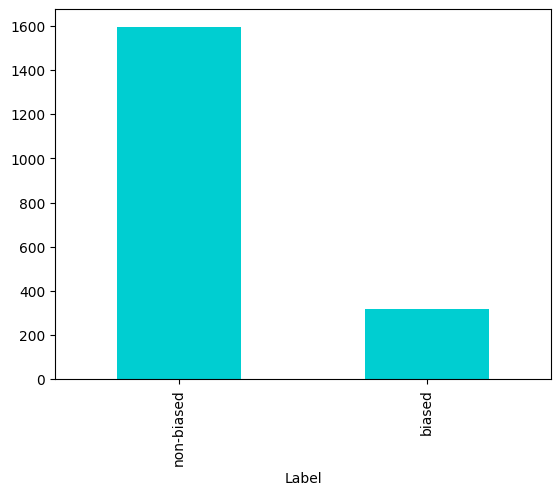

In [8]:
tweets['Label'].value_counts().plot(kind='bar',color= '#00CED1') #Visualización de la distribución de etiquetas

**Pregunta:** ¿Qué proporción de tweets son 'biased' y 'non-biased'? ¿Por qué podría ser importante esta proporción para el análisis de texto?

Según el resultado la proporción de tweets que son 'biased' y 'non-biased' son:
"non-biased" aproximadamente 83.39% de los tweets, esto teniendo en cuenta el "0.833856" que arroja la formula y de "biased" son aproximadamente 16.61% de los tweets, pues la formula arroja "0.166144"; indicando que hay una gran mayoría de tweets clasificados como "no sesgados". Por otro lado, esta proporción odría ser importante para el análisis de texto porque puede influir directamente en la calidad y objetividad del análisis del texto. Es importante tambien si el objetivo es identificar el lenguaje tendencioso o analizar diferencias en tono, contenido o sentimiento. Además de ayudar a interpretar mejor los resultados, entre otras cosas.

## 3. Preprocesamiento de Texto
Realizamos una serie de pasos para limpiar y preparar el texto para el análisis: limpieza de caracteres especiales, conversión a minúsculas, y eliminación de stopwords.

In [9]:
def limpiar_texto(texto):
    texto = texto.lower()
    texto = re.sub(r'[^\w\s]', '', texto)
    palabras = texto.split()

    palabras = [palabra for palabra in palabras if palabra not in stop_words]
    palabras = [palabra for palabra in palabras if len (palabra)>4]
    return ' '.join(palabras)

In [10]:
tweets['tweet_limpio'] = tweets['Contents'].apply(limpiar_texto)
tweets.head()

,Contents,Label,tweet_limpio
0,@chumeltorres ya cabrón! sin tí se reciben las...,biased,chumeltorres cabrón reciben noticias colchonci...
1,¿alguien es tan amable de ir a hacerme la comp...,non-biased,alguien amable hacerme compra mañana bajón ant...
2,"@jenniferduquee hahaha, si está rico, nadamas ...",non-biased,jenniferduquee hahaha nadamas falta presentación
3,@evagelcot donde lo ves!!? es mi programa favo...,non-biased,evagelcot programa favorito encuentro temporad...
4,como siempre mi tortilla triunfa mas que otros...,non-biased,siempre tortilla triunfa platos playa httpstco...


## 4. Análisis de Frecuencia de Palabras por Etiqueta
Contamos las palabras en tweets 'biased' y 'non-biased' y visualizamos las palabras más comunes.

In [11]:
tweets_biased = tweets[tweets['Label'] == 'biased']['tweet_limpio']
tweets_non_biased = tweets[tweets['Label'] == 'non-biased']['tweet_limpio'] #Se filtraron los tweets por etiqueta

counter_biased = Counter(" ".join(tweets_biased).split()) #Conteo de los tweets
counter_non_biased = Counter(" ".join(tweets_non_biased).split())

top_biased = counter_biased.most_common(10) #Las 10 más comunes
top_non_biased = counter_non_biased.most_common(10)

In [12]:
counter_biased.most_common(10)

[('mujer', 23),
 ('mujeres', 19),
 ('quiero', 14),
 ('mejor', 13),
 ('cosas', 10),
 ('niñas', 10),
 ('chicas', 9),
 ('hombres', 9),
 ('ahora', 8),
 ('bonita', 8)]

In [13]:
counter_non_biased.most_common(10)

[('gracias', 90),
 ('quiero', 62),
 ('mejor', 62),
 ('feliz', 50),
 ('ahora', 47),
 ('hacer', 46),
 ('bueno', 43),
 ('cosas', 42),
 ('siempre', 40),
 ('gente', 40)]

In [14]:
tweets_biased.head()

,tweet_limpio
0,chumeltorres cabrón reciben noticias colchonci...
26,sergiosmiles mirate grayman
34,samm_bntz error chismosa quieren lista amigos ...
38,mujeres pasionales
46,albgard llamando gordo jajaja grazie ruliño mi...


In [15]:
tweets_non_biased.head()

,tweet_limpio
1,alguien amable hacerme compra mañana bajón ant...
2,jenniferduquee hahaha nadamas falta presentación
3,evagelcot programa favorito encuentro temporad...
4,siempre tortilla triunfa platos playa httpstco...
5,quiero alguien conmigo


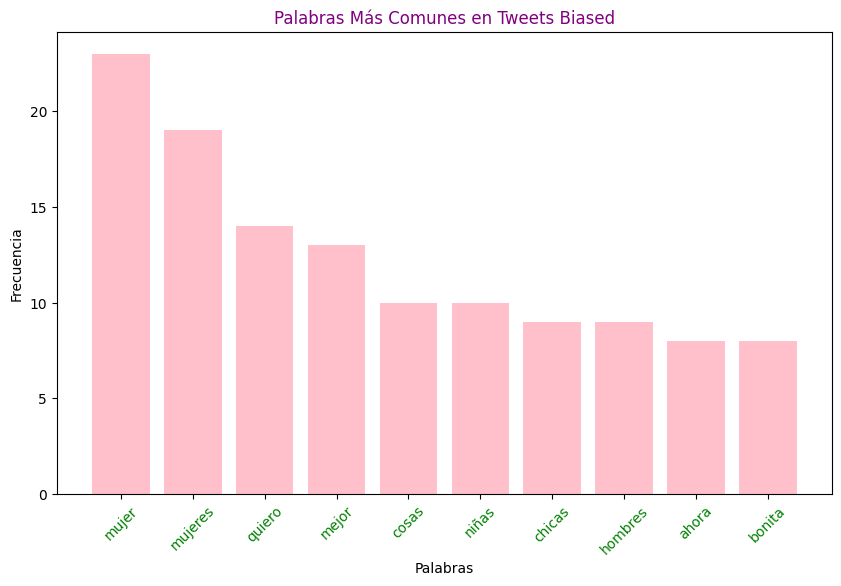

In [16]:
plt.figure(figsize=(10, 6))
plt.bar(range(len(top_biased)), [count for _, count in top_biased], color= 'pink')
plt.xticks(range(len(top_biased)), [word for word, _ in top_biased], rotation=45, color= 'green' )
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.title('Palabras Más Comunes en Tweets Biased', color= 'purple')
plt.show ()

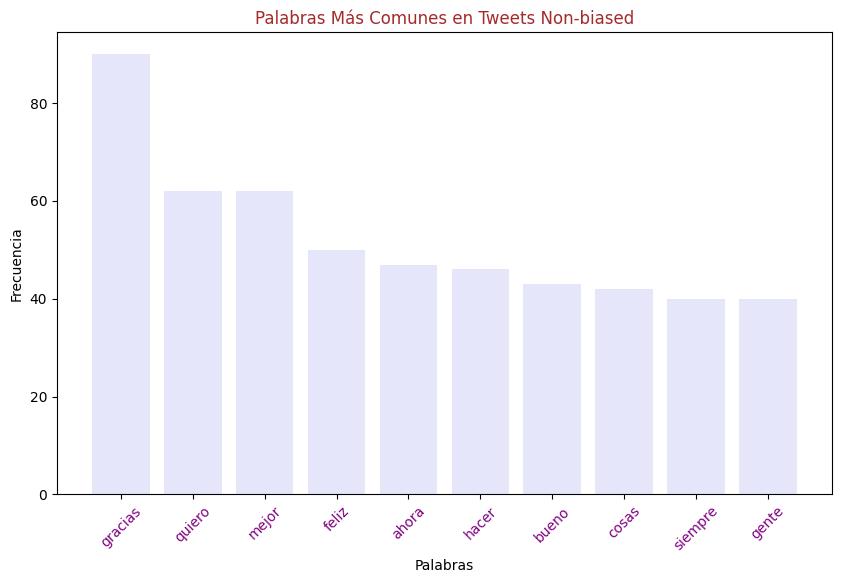

In [17]:
plt.figure(figsize=(10, 6))
plt.bar(range(len(top_non_biased)), [count for _, count in top_non_biased],color = '#E6E6FA')
plt.xticks(range(len(top_non_biased)), [word for word, _ in top_non_biased], rotation=45, color= 'purple')
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.title('Palabras Más Comunes en Tweets Non-biased', color= 'brown')
plt.show ()

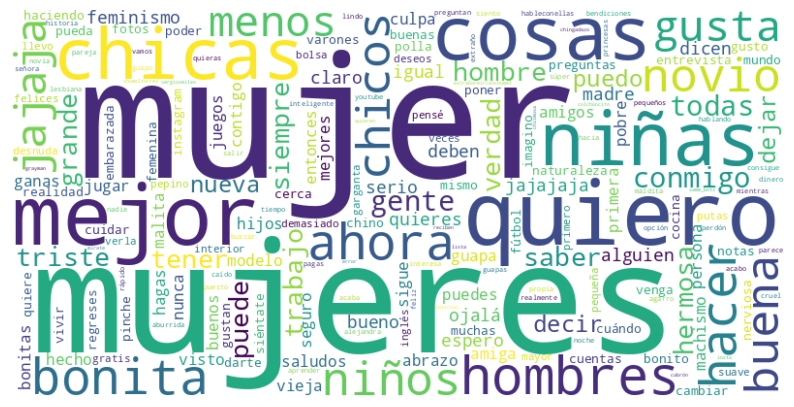

In [18]:
nube = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(counter_biased)
plt.figure(figsize=(10, 6))
plt.imshow(nube, interpolation='bilinear')
plt.axis('off')
plt.show()

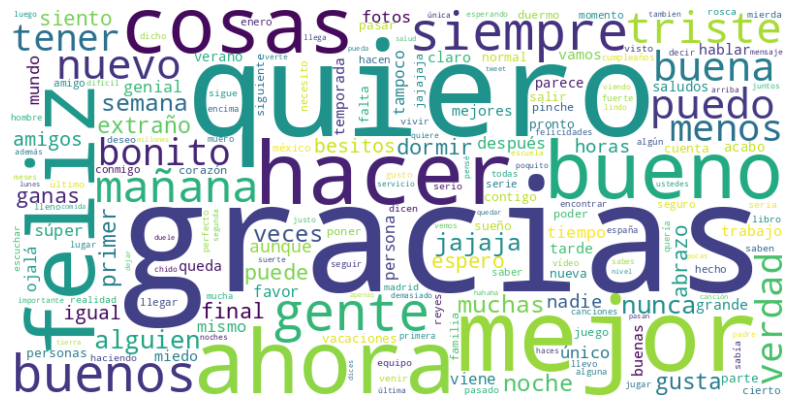

In [19]:
nube= WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(counter_non_biased)
plt.figure(figsize=(10, 6))
plt.imshow(nube, interpolation='bilinear')
plt.axis('off')
plt.show()

**Preguntas de Análisis de Frecuencia:**
- ¿Qué palabras son más comunes en los tweets 'biased' en comparación con los 'non-biased'?
- ¿Hay palabras que sugieran un sesgo en los tweets etiquetados como 'biased'?
- ¿Cómo podrían usar las empresas esta información para entender mejor las opiniones sesgadas?

Las palabras más comunes en los tweets "biased" son “mujer”, “mujeres”, "quiero", "cosas", “niñas”, “chicas”, “hombres”, "ahora" y “bonita”, todas ellas relacionadas con el género o aspectos físicos. En cambio, en los tweets "non-biased" predominan términos como “gracias”, "quiero", "mejor", “feliz”, ahora", “hacer”, “bueno”, “siempre” y “gente”, que reflejan un lenguaje más general, positivo y menos centrado en cuestiones personales o de identidad.

Como se menciono anteriormente, si hay palabras que sugieran un sesgo en los tweets etiquetados como 'biased', pues las palabras como “mujer”, “mujeres”, “niñas”, “chicas”, “hombres” y “bonita” sugieren un sesgo, ya que están relacionadas con el género, lo cual puede indicar estereotipos o enfoques diferenciados hacia las personas en función de su identidad, lo que da a entender que tienen un lenguaje que puede reflejar juicios o actitudes implícitas que revelan parcialidad.

Las empresas pueden utilizar esta información para detectar patrones de sesgo en las conversaciones de redes sociales, así como identificar temas sensibles relacionados con el género o estereotipos y adaptar así las estrategias de comunicación/marketing. Tambien les ayuda a capacitar a sus equipos en comunicación inclusiva y prevenir posibles crisis reputacionales al promover o incluir palabras que lleven a pensar en juicios, estereotipos y demás solo por usar las palabras inadecuadas.

## 5. Análisis de Sentimientos
Usaremos `TextBlob` para calcular el sentimiento de cada tweet y luego compararemos la distribución de sentimientos entre tweets 'biased' y 'non-biased'.

In [20]:
def analizar_sentimiento(texto):
    analysis = TextBlob(texto)
    return analysis.sentiment.polarity

tweets ['sentimiento'] = tweets['tweet_limpio'].apply(analizar_sentimiento) #análisis de sentimientos
tweets.groupby('Label')['sentimiento'].mean() #promedio de sentimientos por etiqueta

,sentimiento
Label,
biased,-0.004036
non-biased,0.001621


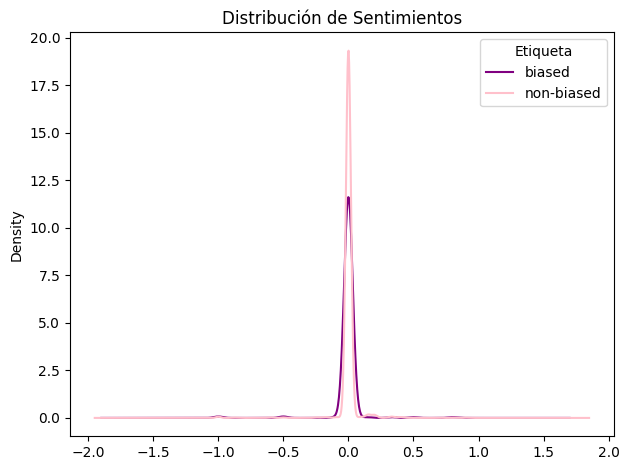

In [21]:
# Comparativo de la distribución de sentimientos entre tweets 'biased' y 'non-biased'

colores= {'biased': 'purple', 'non-biased': 'pink'}

for label, grupo in tweets.groupby('Label'):
    grupo['sentimiento'].plot(kind='density', label=label, color=colores.get(label, 'gray'))

plt.title('Distribución de Sentimientos')
figsize=(10,9)
plt.legend(title='Etiqueta')
plt.tight_layout()
plt.show()

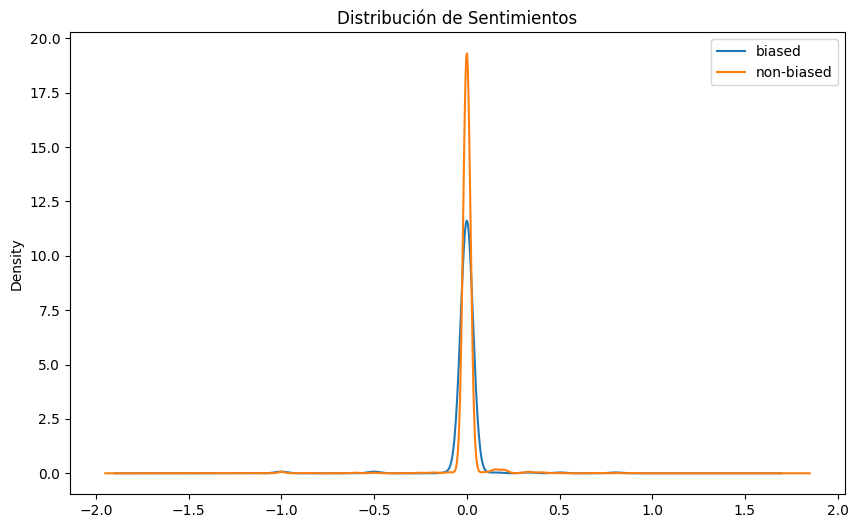

In [22]:
# Comparativo de la distribución de sentimientos entre tweets 'biased' y 'non-biased'
tweets.groupby('Label')['sentimiento'].plot(kind='density', legend=True, figsize=(10,6), title= 'Distribución de Sentimientos')
plt.show()


**Preguntas de Análisis de Sentimientos:**
- ¿Existe una diferencia notable en los sentimientos de tweets 'biased' vs 'non-biased'?
- ¿Qué indica esta diferencia sobre la naturaleza de los tweets sesgados?
- ¿Cómo podrías aplicar el análisis de sentimientos para entender la percepción del público sobre un tema específico?

Sí, existe una diferencia, es ligera pero se detecta, pues el promedio del sentimiento para los tweets "biased" es levemente negativo (-0.004036), mientras que para los "non-biased" es ligeramente positivo (0.001621). Los "biased" tienden a expresar una cola más pronunciada hacia los valores negativos en el gráfico.

¿Qué indica esta diferencia sobre la naturaleza de los tweets sesgados?
Esta diferencia indica que los tweets etiquetados como "biased" tienden a contener más emociones negativas, lo que puede reflejar que los sesgos en la comunicación están asociados a juicios, expresiones polarizadas o lenguaje cargado emocionalmente desde el desconocimiento. Se podría decir que esta diferencia del sesgo se puede usar para persuadir, criticar o favorecer una posición ideológica.

El análisis de sentimientos permite a las empresas o investigadores evaluar cómo se sienten las personas respecto a un tema sin leer manualmente cada mensaje. Por ejemplo, en una campaña de marketing, se podría monitorear si las reacciones a un producto son mayoritariamente positivas o negativas. En térmios de debates sociales o políticos, se podría identificar si hay polarización emocional o en una gestión de crisis, detectar a tiempo el aumento repentino de sentimientos negativos podría ayudar a intervenir.

## 6. Visualización con Nube de Palabras
Usamos una nube de palabras para visualizar las palabras más comunes en cada conjunto de tweets.

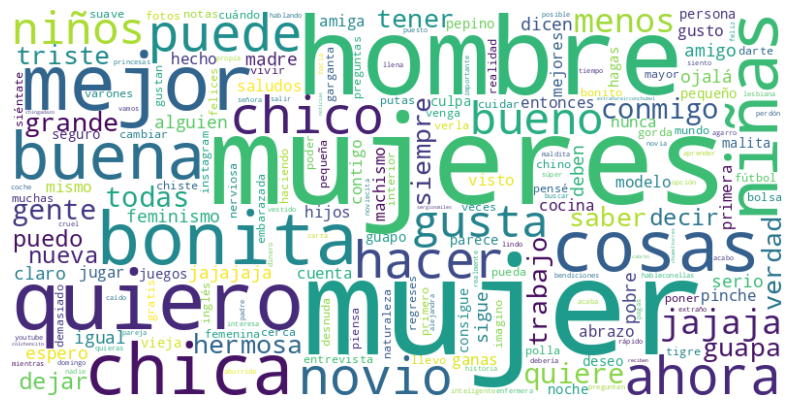

In [23]:
def generar_nube(texto):
    nube = WordCloud(width=800, height=400, background_color='white').generate(texto)
    plt.figure(figsize=(10, 6))
    plt.imshow(nube, interpolation='bilinear')
    plt.axis('off')
    plt.show()

generar_nube(" ".join(tweets[tweets['Label'] == 'biased']['tweet_limpio']))

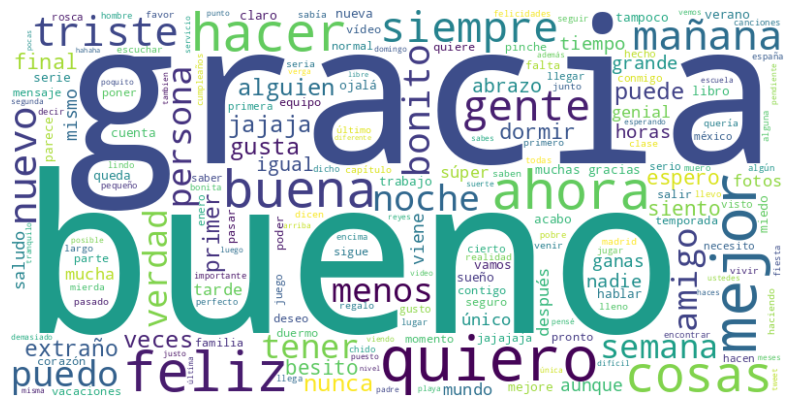

In [24]:
generar_nube(" ".join(tweets[tweets['Label'] == 'non-biased']['tweet_limpio']))

## 7. Conclusiones y Perspectiva de Negocios
En este taller, hemos explorado cómo el análisis de texto puede ofrecer información valiosa sobre el contenido y el sentimiento de los tweets. Reflexionemos sobre algunas preguntas de negocio:
- ¿Cómo podría utilizarse este análisis para mejorar la comunicación de la marca?
- ¿Qué ajustes se podrían hacer en una campaña de marketing si los tweets son predominantemente 'biased'?
- ¿Qué patrones importantes se podrían explorar en un análisis futuro (e.g., análisis de tendencias a lo largo del tiempo)?

Este análisis al permitir identificar el tono emocional y la percepción pública hacia temas clave relacionados con la marca puede mejorar la comunicación de la marca, pues al conocer qué palabras y sentimientos que predominan en los tweets, es decir, si son negativos o sesgados, una marca puede ajustar su lenguaje, elegir voceros o una imagen de marca más neutral, así como evitaria mensajes que generen polarización. Además, se podría detectar qué valores o mensajes generan mayor afinidad con la audiencia y reforzar en su comunicación y lenguaje.

Los ajustes que se podrían hacer en una campaña de marketing si los tweets son predominantemente 'biased son revisar el lenguaje y el contenido para asegurarse de que no esté provocando interpretaciones parciales o polarizadas. Asimismo, ajustar la diversifición de los canales, voceros y la imagen de marca con el fin de alcanzar audiencias con distintas perspectivas o la que se buscan; de igual forma, se podría enfocar de mejor manera el mensaje, es decir, en hechos o beneficios, logrando reducir las expresiones emocionales que podrían ser interpretadas como manipulación, favoritismo, prejuciosas o estandarizadas. Finalmente, monitorear en tiempo real para responder rápidamente a señales de controversia, negativismo o rechazo.

Los patrones importantes que se podrían explorar en un análisis futuro son las tendencias temporales en el sentimiento y sesgo, esto durante los días, semanas y campañas. Al igual, se podrían explorar en el análisis de temas específicos para ver cómo varía el sentimiento según el contenido del tweet o lo que se consume dentro de la app, asimismo, se puede explorar la relación entre las palabras clave y la polaridad que hay en estas, logrando así identificar que términos elevan o bajan el sentimiento, es decir, como influyen en las personas. Del mismo modo, el análisis de redes o comunidades, así como la comparación entre geografías o demografías.